# 2020年のデータの可視化
- 卸売価格について
- 取引数量について

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import japanize_matplotlib

In [95]:
df_raw = pd.read_csv("../data/kk.csv")
# 全体のみを利用(産地名NaN)
is_nan = [df_raw["産地名"][i] is df_raw["産地名"][0] for i in range(df_raw.shape[0])]
df = df_raw[is_nan].copy()
del_columns = ["産地名", "産地コード", "品目名", "品目コード", "対前日比（数量）", "対前日比（価格）"]
df = df.drop(del_columns, axis=1).copy()


In [96]:
# 日にちの処理
# timestamp型 → timedelta
# date_columns = ["年", "月", "日"]
date = [str(df["年"].iloc[i])+"-"+str(df["月"].iloc[i])+"-" +
        str(df["日"].iloc[i]) for i in range(df.shape[0])]
df["date"] = pd.to_datetime(date)
# df = df.drop(date_columns, axis=1).copy()
df["days"] = [(date - df["date"][0]).days for date in df["date"]]


In [97]:
year = 2020

In [98]:
df2020 = df[df["年"]==year].copy()
df2020["days"] -= df2020["days"].iloc[0]

In [99]:
df2020

,年,月,日,曜日,数量,価格,date,days
10904,2020,1,5,日,879247,2081,2020-01-05,0
10910,2020,1,6,月,227239,1973,2020-01-06,1
10916,2020,1,7,火,97807,2043,2020-01-07,2
10922,2020,1,9,木,321577,1854,2020-01-09,4
10928,2020,1,10,金,256428,1903,2020-01-10,5
...,...,...,...,...,...,...,...,...
12349,2020,12,26,土,275951,2030,2020-12-26,356
12355,2020,12,27,日,98316,2080,2020-12-27,357
12361,2020,12,28,月,381270,2039,2020-12-28,358
12367,2020,12,29,火,280964,2108,2020-12-29,359


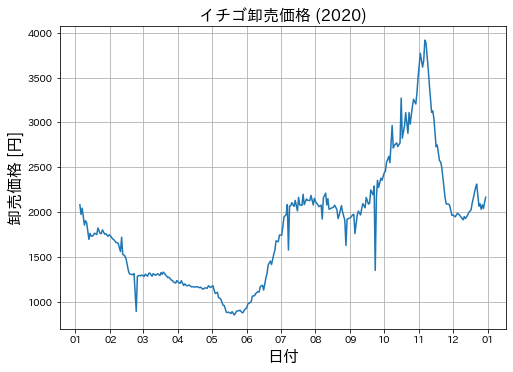

In [100]:
# 価格のプロット
fig, ax = plt.subplots()
ax.grid()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.plot(df2020["date"], df2020["価格"])
# ax.legend(fontsize=16)
ax.set_xlabel("日付", fontsize=16)
ax.set_ylabel("卸売価格 [円]", fontsize=16)
ax.set_title("イチゴ卸売価格 (2020)", fontsize=16)

# Formatterでx軸の日付ラベルを月・日に設定
xfmt = mdates.DateFormatter("%m")
xloc = mdates.MonthLocator()

ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(xfmt)

# ax.set_aspect('equal', adjustable='box')

plt.show()



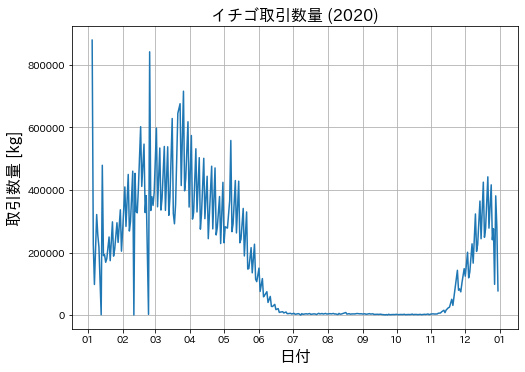

In [101]:
# 価格のプロット
fig, ax = plt.subplots()
ax.grid()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.plot(df2020["date"], df2020["数量"])
# ax.legend(fontsize=16)
ax.set_xlabel("日付", fontsize=16)
ax.set_ylabel("取引数量 [kg]", fontsize=16)
ax.set_title("イチゴ取引数量 (2020)", fontsize=16)

# Formatterでx軸の日付ラベルを月・日に設定
xfmt = mdates.DateFormatter("%m")
xloc = mdates.MonthLocator()

ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(xfmt)

# ax.set_aspect('equal', adjustable='box')

plt.show()



In [102]:
yearlist = np.arange(10) + 2012

No handles with labels found to put in legend.


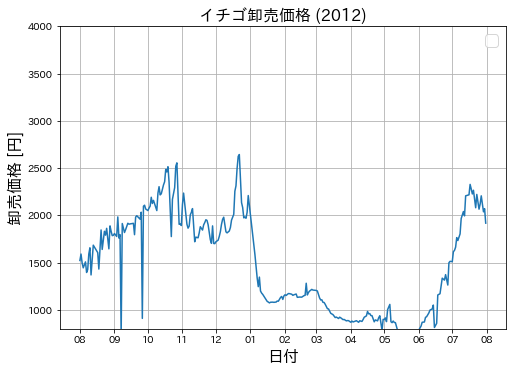

No handles with labels found to put in legend.


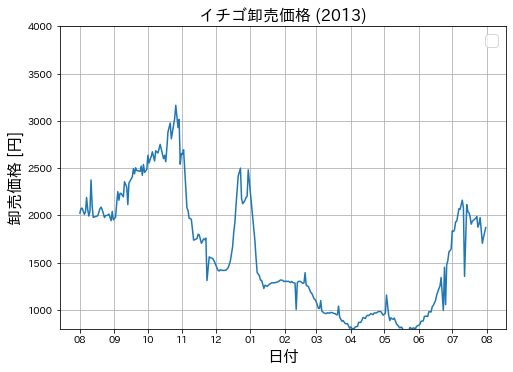

No handles with labels found to put in legend.


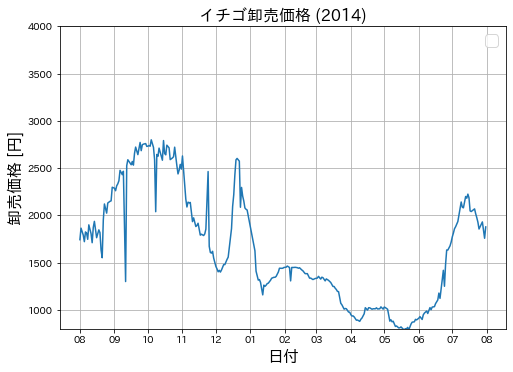

No handles with labels found to put in legend.


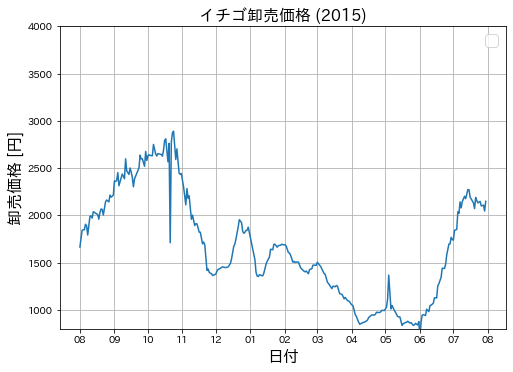

No handles with labels found to put in legend.


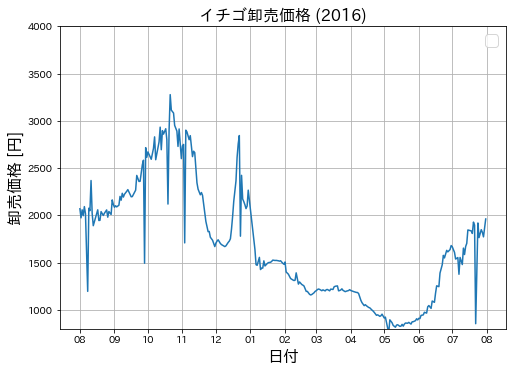

No handles with labels found to put in legend.


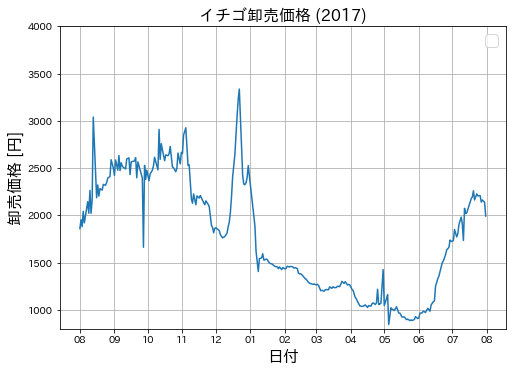

No handles with labels found to put in legend.


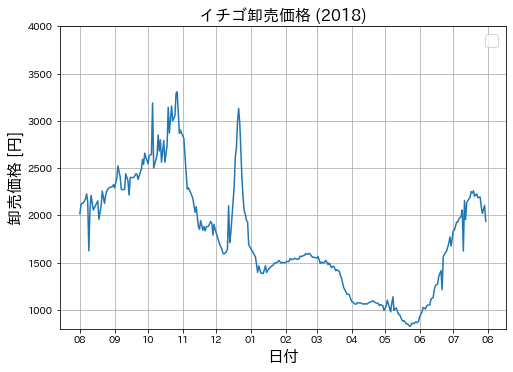

No handles with labels found to put in legend.


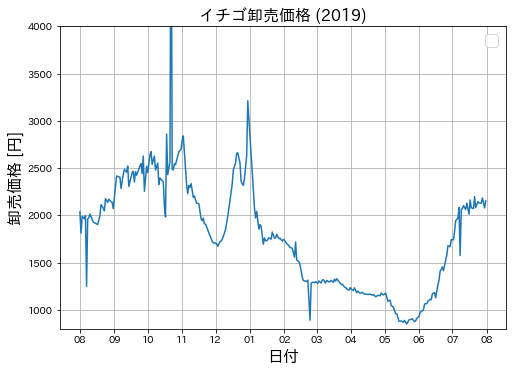

No handles with labels found to put in legend.


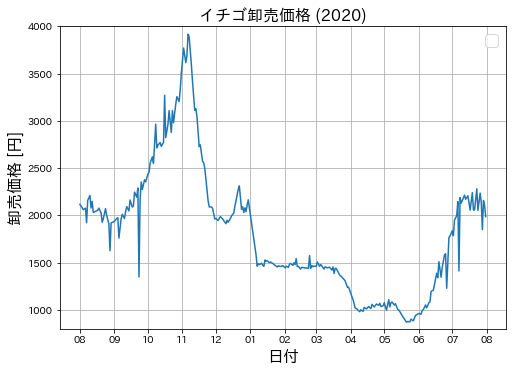

No handles with labels found to put in legend.


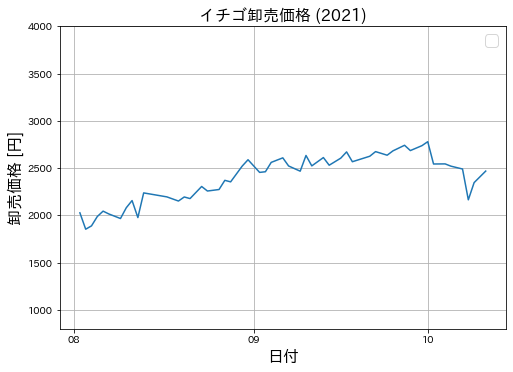

In [109]:
for year in yearlist:
    start = str(year)+"-08-01"
    end = str(year+1)+"-08-01"
    df_temp = df_plot = df[(df["date"] >= pd.to_datetime(start)) & (df["date"] < pd.to_datetime(end))].copy()


    # 価格のプロット
    fig, ax = plt.subplots()
    ax.grid()
    fig.set_figwidth(8)
    fig.set_figheight(6)

    ax.plot(df_temp["date"], df_temp["価格"])
    ax.legend(fontsize=16)
    ax.set_xlabel("日付", fontsize=16)
    ax.set_ylabel("卸売価格 [円]", fontsize=16)
    ax.set_title("イチゴ卸売価格 (" + str(year) + ")", fontsize=16)

    # Formatterでx軸の日付ラベルを月・日に設定
    xfmt = mdates.DateFormatter("%m")
    xloc = mdates.MonthLocator()

    ax.xaxis.set_major_locator(xloc)
    ax.xaxis.set_major_formatter(xfmt)

    ax.set_ylim([800,4000])

    plt.show()



In [106]:
year=2020
str(year)+"-08-01"

'2020-08-01'

No handles with labels found to put in legend.


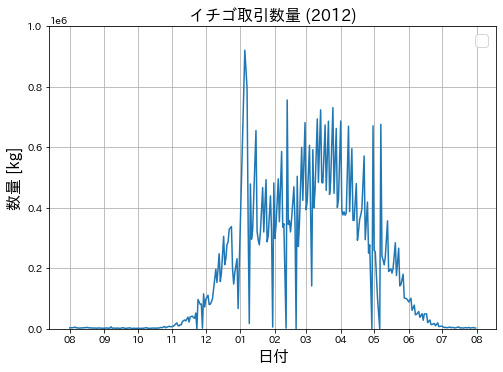

No handles with labels found to put in legend.


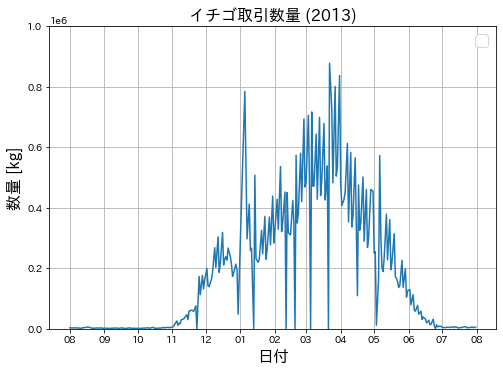

No handles with labels found to put in legend.


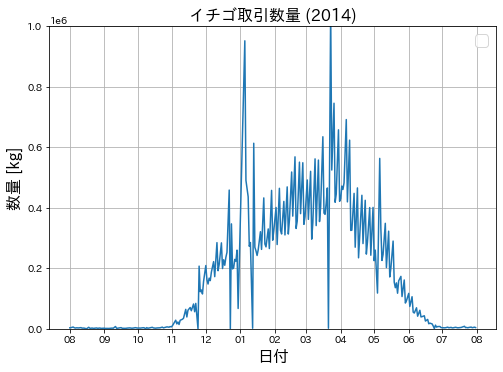

No handles with labels found to put in legend.


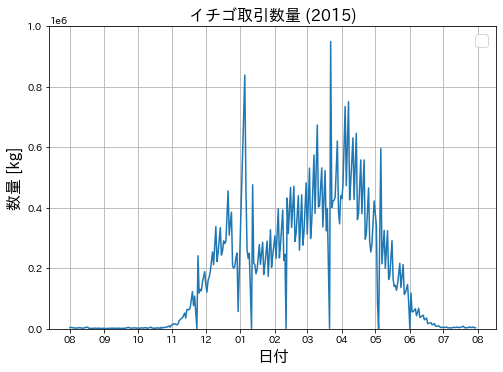

No handles with labels found to put in legend.


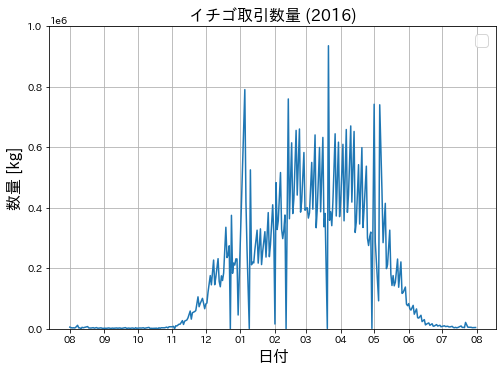

No handles with labels found to put in legend.


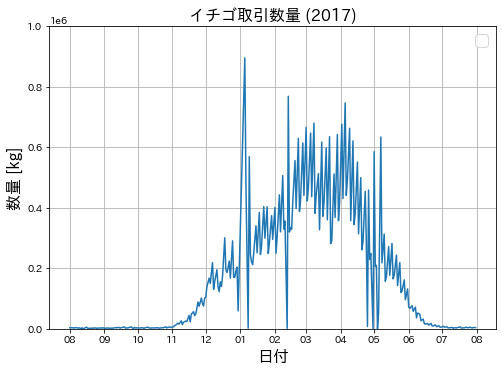

No handles with labels found to put in legend.


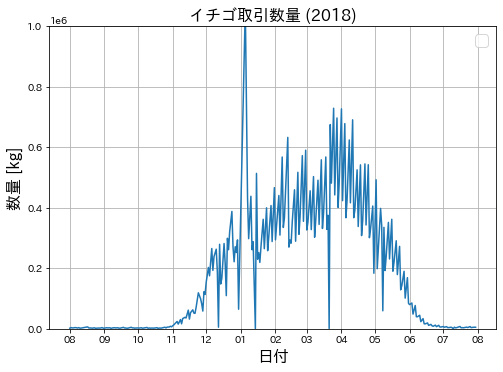

No handles with labels found to put in legend.


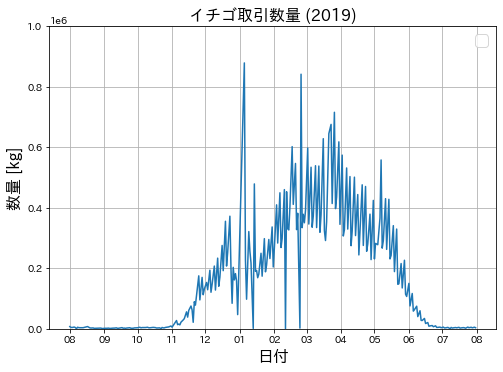

No handles with labels found to put in legend.


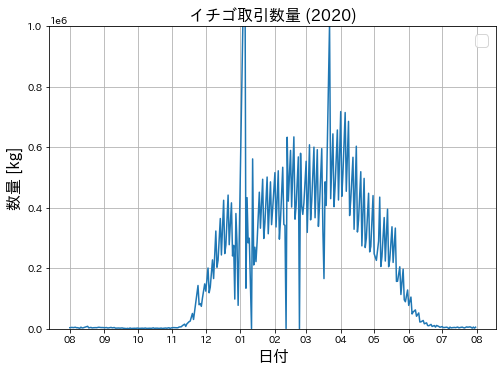

No handles with labels found to put in legend.


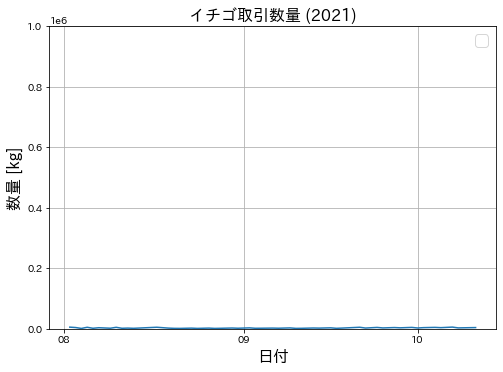

In [108]:
for year in yearlist:
    start = str(year)+"-08-01"
    end = str(year+1)+"-08-01"
    df_temp = df_plot = df[(df["date"] >= pd.to_datetime(start)) & (df["date"] < pd.to_datetime(end))].copy()

    # 価格のプロット
    fig, ax = plt.subplots()
    ax.grid()
    fig.set_figwidth(8)
    fig.set_figheight(6)

    ax.plot(df_temp["date"], df_temp["数量"])
    ax.legend(fontsize=16)
    ax.set_xlabel("日付", fontsize=16)
    ax.set_ylabel("数量 [kg]", fontsize=16)
    ax.set_title("イチゴ取引数量 (" + str(year) + ")", fontsize=16)

    # Formatterでx軸の日付ラベルを月・日に設定
    xfmt = mdates.DateFormatter("%m")
    xloc = mdates.MonthLocator()

    ax.xaxis.set_major_locator(xloc)
    ax.xaxis.set_major_formatter(xfmt)

    ax.set_ylim([0,1000000])

    plt.show()



In [67]:
max_prices = []
max_nums = []

for year in yearlist:
    df_temp = df[df["年"]==year].copy()
    max_prices.append(df_temp[df_temp["価格"]==df_temp["価格"].max()].date)
    max_nums.append(df_temp[df_temp["数量"]==df_temp["数量"].max()].date)

In [68]:
max_prices

[1075   2012-12-22
 Name: date, dtype: datetime64[ns],
 2004   2013-10-26
 Name: date, dtype: datetime64[ns],
 3044   2014-10-04
 Name: date, dtype: datetime64[ns],
 4575   2015-10-24
 Name: date, dtype: datetime64[ns],
 6124   2016-10-21
 Name: date, dtype: datetime64[ns],
 7906   2017-12-22
 Name: date, dtype: datetime64[ns],
 9147   2018-10-27
 Name: date, dtype: datetime64[ns],
 10597   2019-10-22
 Name: date, dtype: datetime64[ns],
 12134   2020-11-06
 Name: date, dtype: datetime64[ns],
 13451   2021-10-01
 Name: date, dtype: datetime64[ns]]

In [69]:
max_nums

[0   2012-01-05
 Name: date, dtype: datetime64[ns],
 1107   2013-01-05
 Name: date, dtype: datetime64[ns],
 2446   2014-03-22
 Name: date, dtype: datetime64[ns],
 3644   2015-03-23
 Name: date, dtype: datetime64[ns],
 5220   2016-03-22
 Name: date, dtype: datetime64[ns],
 6779   2017-03-21
 Name: date, dtype: datetime64[ns],
 7954   2018-01-05
 Name: date, dtype: datetime64[ns],
 9426   2019-01-05
 Name: date, dtype: datetime64[ns],
 10904   2020-01-05
 Name: date, dtype: datetime64[ns],
 12378   2021-01-05
 Name: date, dtype: datetime64[ns]]

In [71]:
df_plot = df[(df["date"] >= pd.to_datetime("2020-08-01")) & (df["date"] < pd.to_datetime("2021-08-01"))].copy()

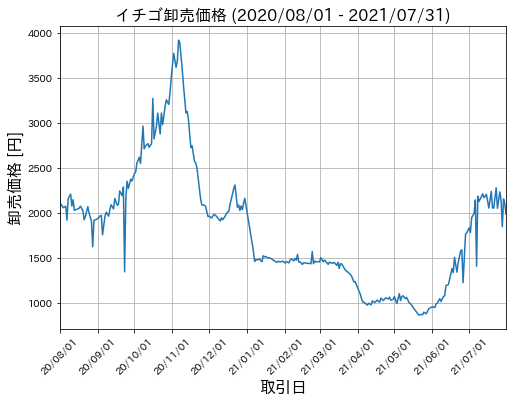

In [91]:
plt.rcParams['figure.subplot.bottom'] = 0.18
fig, ax = plt.subplots()
ax.grid()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.plot(df_plot["date"], df_plot["価格"])
# ax.legend(fontsize=16)
ax.set_xlabel("取引日", fontsize=16)
ax.set_ylabel("卸売価格 [円]", fontsize=16)
ax.set_title("イチゴ卸売価格 (2020/08/01 - 2021/07/31)", fontsize=16)

# Formatterでx軸の日付ラベルを月・日に設定
xfmt = mdates.DateFormatter("%y/%m/%d")
xloc = mdates.MonthLocator()

ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(xfmt)

plt.xticks(rotation=45)
plt.xlim([pd.to_datetime("2020-08-01"), pd.to_datetime("2021-07-31")])

fig.savefig("../images/output2.png")

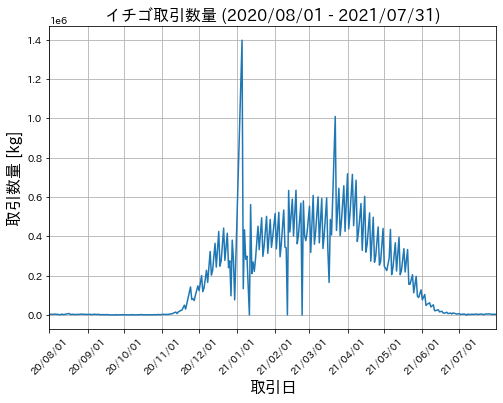

In [93]:
plt.rcParams['figure.subplot.bottom'] = 0.18
fig, ax = plt.subplots()
ax.grid()
fig.set_figwidth(8)
fig.set_figheight(6)

ax.plot(df_plot["date"], df_plot["数量"])
# ax.legend(fontsize=16)
ax.set_xlabel("取引日", fontsize=16)
ax.set_ylabel("取引数量 [kg]", fontsize=16)
ax.set_title("イチゴ取引数量 (2020/08/01 - 2021/07/31)", fontsize=16)

# Formatterでx軸の日付ラベルを月・日に設定
xfmt = mdates.DateFormatter("%y/%m/%d")
xloc = mdates.MonthLocator()

ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(xfmt)

plt.xticks(rotation=45)
plt.xlim([pd.to_datetime("2020-08-01"), pd.to_datetime("2021-07-31")])

fig.savefig("../images/output1.png")